**Image Augmentation**

In [1]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
xtrain = train_datagen.flow_from_directory('Flowers-Dataset/flowers',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 4317 images belonging to 5 classes.


In [7]:
xtest = test_datagen.flow_from_directory('Flowers-Dataset/flowers',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 4317 images belonging to 5 classes.


**Create model**

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [9]:
model = Sequential()

**Convolution layer**

In [10]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

**Maxpooling **

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

**Flatten**

In [12]:
model.add(Flatten())

**Dense layer**

In [13]:
model.add(Dense(300,activation='relu')) #hiddenlayer 1
model.add(Dense(300,activation='relu')) #hiddenlayer 2
model.add(Dense(150,activation='relu')) #hiddenlayer 3

**Output layer**

In [14]:
model.add(Dense(5,activation='softmax'))

**Compile the model**

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,                
                    validation_data=xtest,
                    validation_steps=len(xtest))

C:\Users\ramvi\AppData\Local\Temp\ipykernel_24544\2033910576.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(xtrain,


Epoch 1/10
44/44 [==============================] - 24s 529ms/step - loss: 1.4021 - accuracy: 0.3919 - val_loss: 1.1613 - val_accuracy: 0.5244
Epoch 2/10
44/44 [==============================] - 22s 495ms/step - loss: 1.1267 - accuracy: 0.5413 - val_loss: 1.0386 - val_accuracy: 0.5868
Epoch 3/10
44/44 [==============================] - 22s 500ms/step - loss: 1.0428 - accuracy: 0.5874 - val_loss: 0.9826 - val_accuracy: 0.6139
Epoch 4/10
44/44 [==============================] - 23s 536ms/step - loss: 0.9886 - accuracy: 0.6034 - val_loss: 0.9795 - val_accuracy: 0.6120
Epoch 5/10
44/44 [==============================] - 22s 502ms/step - loss: 0.9264 - accuracy: 0.6361 - val_loss: 0.9692 - val_accuracy: 0.6194
Epoch 6/10
44/44 [==============================] - 23s 529ms/step - loss: 0.9095 - accuracy: 0.6430 - val_loss: 0.8782 - val_accuracy: 0.6525
Epoch 7/10
44/44 [==============================] - 22s 501ms/step - loss: 0.8741 - accuracy: 0.6599 - val_loss: 0.8575 - val_accuracy: 0.6732

**Saving**

In [17]:
model.save('Flowers.h5')

**Testing the model**

In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [21]:
img = image.load_img('Flowers-Dataset/flower.jpg',target_size=(64,64))

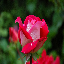

In [22]:
img

In [23]:
x = image.img_to_array(img)
x

array([[[ 7., 14.,  6.],
        [12., 24., 12.],
        [12., 24., 12.],
        ...,
        [29., 62.,  7.],
        [28., 60., 10.],
        [26., 53., 10.]],

       [[ 8., 18.,  7.],
        [20., 33., 16.],
        [12., 25.,  8.],
        ...,
        [32., 61., 13.],
        [21., 47.,  2.],
        [28., 51.,  9.]],

       [[18., 30., 16.],
        [17., 32., 11.],
        [11., 23.,  9.],
        ...,
        [27., 64., 20.],
        [26., 52., 15.],
        [21., 43.,  7.]],

       ...,

       [[26., 62., 16.],
        [25., 63., 24.],
        [33., 69., 33.],
        ...,
        [25., 51., 16.],
        [20., 39., 11.],
        [12., 20.,  7.]],

       [[26., 61., 21.],
        [32., 64., 27.],
        [30., 63., 32.],
        ...,
        [22., 53., 19.],
        [18., 38., 13.],
        [ 8., 15.,  7.]],

       [[27., 54., 23.],
        [23., 52., 21.],
        [32., 60., 37.],
        ...,
        [22., 56., 21.],
        [16., 35., 13.],
        [ 7., 14.,  6.]]

In [24]:
x = np.expand_dims(x,axis=0)
x

array([[[[ 7., 14.,  6.],
         [12., 24., 12.],
         [12., 24., 12.],
         ...,
         [29., 62.,  7.],
         [28., 60., 10.],
         [26., 53., 10.]],

        [[ 8., 18.,  7.],
         [20., 33., 16.],
         [12., 25.,  8.],
         ...,
         [32., 61., 13.],
         [21., 47.,  2.],
         [28., 51.,  9.]],

        [[18., 30., 16.],
         [17., 32., 11.],
         [11., 23.,  9.],
         ...,
         [27., 64., 20.],
         [26., 52., 15.],
         [21., 43.,  7.]],

        ...,

        [[26., 62., 16.],
         [25., 63., 24.],
         [33., 69., 33.],
         ...,
         [25., 51., 16.],
         [20., 39., 11.],
         [12., 20.,  7.]],

        [[26., 61., 21.],
         [32., 64., 27.],
         [30., 63., 32.],
         ...,
         [22., 53., 19.],
         [18., 38., 13.],
         [ 8., 15.,  7.]],

        [[27., 54., 23.],
         [23., 52., 21.],
         [32., 60., 37.],
         ...,
         [22., 56., 21.],
        

In [25]:
model.predict(x)

1/1 [==============================] - 2s 2s/step


array([[0., 0., 1., 0., 0.]], dtype=float32)

In [26]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [27]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

1/1 [==============================] - 0s 18ms/step


'rose'